# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
new_dir = "E:\\TFOD"
# os.mkdir(new_dir)
os.chdir(new_dir)

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join(new_dir,'Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join(new_dir,'Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join(new_dir,'Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join(new_dir,'Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join(new_dir, 'Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join(new_dir, 'Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join(new_dir,'Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join(new_dir, 'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join(new_dir, 'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join(new_dir, 'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join(new_dir, 'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join(new_dir,'Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join(new_dir,'Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
files

{'PIPELINE_CONFIG': 'E:\\TFOD\\Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config',
 'TF_RECORD_SCRIPT': 'E:\\TFOD\\Tensorflow\\scripts\\generate_tfrecord.py',
 'LABELMAP': 'E:\\TFOD\\Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [16]:
!conda activate tf_objectdetection && pip install wget --quiet

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [21]:
if os.name=='nt':
    # !python -m pip install wget
    import wget

In [18]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'E:\TFOD\Tensorflow\models'...
Updating files:   2% (66/2948)
Updating files:   3% (89/2948)
Updating files:   4% (118/2948)
Updating files:   5% (148/2948)
Updating files:   6% (177/2948)
Updating files:   7% (207/2948)
Updating files:   8% (236/2948)
Updating files:   9% (266/2948)
Updating files:  10% (295/2948)
Updating files:  11% (325/2948)
Updating files:  11% (352/2948)
Updating files:  12% (354/2948)
Updating files:  13% (384/2948)
Updating files:  14% (413/2948)
Updating files:  15% (443/2948)
Updating files:  16% (472/2948)
Updating files:  17% (502/2948)
Updating files:  18% (531/2948)
Updating files:  19% (561/2948)
Updating files:  20% (590/2948)
Updating files:  21% (620/2948)
Updating files:  22% (649/2948)
Updating files:  23% (679/2948)
Updating files:  23% (700/2948)
Updating files:  24% (708/2948)
Updating files:  25% (737/2948)
Updating files:  26% (767/2948)
Updating files:  27% (796/2948)
Updating files:  28% (826/2948)
Updating files:  29% (855/2948

In [27]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !conda activate tf_objectdetection && cd E:/TFOD/Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !conda activate tf_objectdetection && cd E:/TFOD/Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !conda activate tf_objectdetection && cd E:/TFOD/Tensorflow/models/research/slim && pip install -e . 

        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detection
copying object_detec

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-37: module references __file__
listing git files failed - pretending there aren't any
zip_safe flag not set; analyzing archive contents...
zip_safe flag not set; analyzing archive contents...
cpuinfo.__pycache__.cpuinfo.cpython-37: module references __file__
cpuinfo.__pycache__.cpuinfo.cpython-37: module MAY be using inspect.stack
cpuinfo.__pycache__.cpuinfo.cpython-37: module MAY be using inspect.trace
zip_safe flag not set; analyzing archive contents...
error: numpy 1.18.1 is installed but numpy>=1.18.2 is required by {'lvis'}


copying object_detection\anchor_generators\multiple_grid_anchor_generator_test.py -> build\lib\object_detection\anchor_generators
copying object_detection\anchor_generators\multiscale_grid_anchor_generator.py -> build\lib\object_detection\anchor_generators
copying object_detection\anchor_generators\multiscale_grid_anchor_generator_test.py -> build\lib\object_detection\anchor_generators
copying object_detection\anchor_generators\__init__.py -> build\lib\object_detection\anchor_generators
creating build\lib\object_detection\box_coders
copying object_detection\box_coders\faster_rcnn_box_coder.py -> build\lib\object_detection\box_coders
copying object_detection\box_coders\faster_rcnn_box_coder_test.py -> build\lib\object_detection\box_coders
copying object_detection\box_coders\keypoint_box_coder.py -> build\lib\object_detection\box_coders
copying object_detection\box_coders\keypoint_box_coder_test.py -> build\lib\object_detection\box_coders
copying object_detection\box_coders\mean_stddev_b

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [29]:
!conda activate tf_objectdetection && pip install --user tensorflow --quiet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [30]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!conda activate tf_objectdetection && python {VERIFICATION_SCRIPT}

2021-12-19 02:49:30.304728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-19 02:49:30.304770: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-19 02:50:30.317752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-12-19 02:50:30.317789: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 02:50:30.320579: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Rajiv2806-Desktop
2021-12-19 02:50:30.320698: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Rajiv2806-Desktop
Running tests under Python 3.7.6: C:\ProgramData\Anaconda3\python.exe
[ RUN      ] ModelBuilderTF2Test

In [15]:
# !pip install tensorflow --upgrade

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached tf_estimator_nightly-2.5.0.dev2021032501-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.28.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.28.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.28.0 requires fastavro<2,>=0.21.4, which is not installed.
apache-beam 2.28.0 requires future<1.0.0,>=0.18.2, which is not installed.
apache-beam 2.28.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.28.0 requires httplib2<0.18.0,>=0.8, which is not installed.
apache-beam 2.28.0 requires mock<3.0.0,>=1.0.1, which is not installed.
tensorflow-datasets 4.2.0 requires attrs>=18.1.0, which is not installed.
tensorflow-datasets 4.2.0 requires dill, which is not installed.
tensorflow-datasets 4.2.0 requires future, which is not installed.
tensorflow-datasets 4.2.0 requires importlib-resources, which is not installed.
tensorflow-datasets 4.2.0 re

In [32]:
!conda activate tf_objectdetection && pip uninstall protobuf matplotlib -y
!conda activate tf_objectdetection && pip install --user protobuf matplotlib==3.2 --quiet

ERROR: lvis 0.5.3 has requirement numpy>=1.18.2, but you'll have numpy 1.18.1 which is incompatible.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


### Importing Obj Det 

In [22]:
# If you get ModuleNotFoundError 
# Restart the Kernel and run only the 
# Required cells
import object_detection

In [7]:
!pip list

Package                          Version
-------------------------------- -------------------
absl-py                          0.12.0


addict                           2.4.0
affine                           2.2.2
afinn                            0.1
aio-pika                         6.8.0
aiofiles                         0.8.0
aiohttp                          3.7.4
aioredis                         2.0.0
aiormq                           3.3.1
alembic                          1.4.3
altair                           4.1.0
amqp                             5.0.6
analytics-python                 1.3.1
aniso8601                        8.0.0
anyio                            3.1.0
appdirs                          1.4.3
APScheduler                      3.6.3
argon2-cffi                      20.1.0
asn1crypto                       0.24.0
astor                            0.8.1
astunparse                       1.6.3
async-generator                  1.10
async-timeout                    3.0.1
attrs                            21.2.0
autocorrect                      2.2.2
Automat                          20.2.0
autoscraper             

keras                            2.6.0
Keras-Applications               1.0.8
keras-bert                       0.88.0
keras-embed-sim                  0.9.0
keras-layer-normalization        0.15.0
keras-multi-head                 0.28.0
keras-nightly                    2.5.0.dev2021032900
keras-pos-embd                   0.12.0
keras-position-wise-feed-forward 0.7.0
Keras-Preprocessing              1.1.2
keras-self-attention             0.50.0
keras-transformer                0.39.0
kiwisolver                       1.3.1
knnimpute                        0.1.0
kombu                            5.1.0
ktrain                           0.26.5
langdetect                       1.0.8
llvmlite                         0.36.0
locket                           0.2.1
Logbook                          1.5.3
ludwig                           0.2.2.7
lunardate                        0.2.0
lxml                             4.6.3
Mako                             1.0.7
Markdown                         3.3.4
M

In [10]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [12]:
# ['thumbsup', 'thumbsdown', 'thankyou', 'livelong']
labels = [{'name':'thumbsup', 'id':1}, {'name':'thumbsdown', 'id':2}, {'name':'thankyou', 'id':3}, {'name':'livelong', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [13]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'E:\TFOD\Tensorflow\scripts'...


In [23]:
!conda activate tf_objectdetection && python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!conda activate tf_objectdetection && python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: E:\TFOD\Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: E:\TFOD\Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [24]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [26]:
!conda activate tf_objectdetection && pip install --user --upgrade h5py --quiet

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [27]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [28]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [29]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [30]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [31]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [32]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [9]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
TRAINING_SCRIPT

In [38]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [39]:
print(command)

python E:\TFOD\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
# Run the above command from an external cmd prompt, as it will take a lot of time to train
# !{command}

# 7. Evaluate the Model

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [11]:
print(command)

python E:\TFOD\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet


In [12]:
# !conda activate tf_objectdetection && {command}

# 8. Load Train Model From Checkpoint

In [13]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [16]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-1')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [25]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [17]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [20]:
paths['IMAGE_PATH']

'E:\\TFOD\\Tensorflow\\workspace\\images'

In [23]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.88042202-6015-11ec-b03b-802bf9aea7b6.jpg')

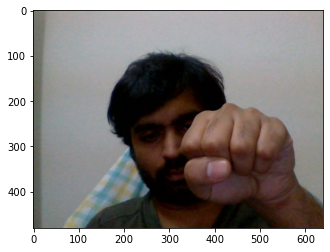

In [26]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
# !pip uninstall opencv-python-headless -y

In [27]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [28]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [29]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [30]:
print(command)

python E:\TFOD\Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet --output_directory=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\export


In [31]:
!conda activate tf_objectdetection && {command}

2021-12-19 18:44:26.338484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-19 18:44:26.338510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-19 18:44:32.045512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-12-19 18:44:32.045535: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 18:44:32.048952: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Rajiv2806-Desktop
2021-12-19 18:44:32.049044: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Rajiv2806-Desktop
2021-12-19 18:44:32.055567: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binar

# 11. Conversion to TFJS

In [32]:
!conda activate tf_objectdetection && pip install tensorflowjs

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [34]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [35]:
!conda activate tf_objectdetection && {command}

Writing weight file E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-12-19 18:48:22.886590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-19 18:48:22.886621: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-19 18:48:31.287914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-12-19 18:48:31.287953: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 18:48:31.291696: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Rajiv2806-Desktop
2021-12-19 18:48:31.291794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Rajiv2806-Desktop
2021-12-19 18:48:31.292022: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binar

# 12. Conversion to TFLite

In [36]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [37]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [42]:
print(command)

python E:\TFOD\Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet --output_directory=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [43]:
!conda activate tf_objectdetection && {command}

2021-12-19 18:50:00.488463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-19 18:50:00.488491: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-19 18:50:04.722401: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-12-19 18:50:04.722422: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 18:50:04.725396: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Rajiv2806-Desktop
2021-12-19 18:50:04.725532: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Rajiv2806-Desktop
2021-12-19 18:50:04.731346: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binar

In [44]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [45]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [46]:
print(command)

tflite_convert --saved_model_dir=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=E:\TFOD\Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [47]:
!conda activate tf_objectdetection && {command}

Estimated count of arithmetic ops: 1.710 G  ops, equivalently 0.855 G  MACs


2021-12-19 18:51:41.228947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-19 18:51:41.228992: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-19 18:51:46.130942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-12-19 18:51:46.130969: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 18:51:46.134480: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Rajiv2806-Desktop
2021-12-19 18:51:46.134572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Rajiv2806-Desktop
2021-12-19 18:51:46.618155: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binar

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')